In [3]:
# ライブラリのimport
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas.io.data import DataReader

/Users/nakanoken/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
from datetime import datetime

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'google', start, end)

In [9]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,143.895896,144.842390,143.005697,144.024263,2.734459e+07
std,16.644734,16.684227,16.338434,16.492941,1.135058e+07
min,109.170000,110.030000,108.250000,109.110000,1.147592e+07
25%,136.330000,136.935000,136.045000,136.680000,2.056140e+07
50%,145.520000,146.740000,144.610000,145.820000,2.476189e+07
75%,156.035000,157.030000,155.020000,155.870000,3.048282e+07
max,175.110000,176.240000,174.330000,176.240000,1.119850e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-21 to 2017-11-17
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


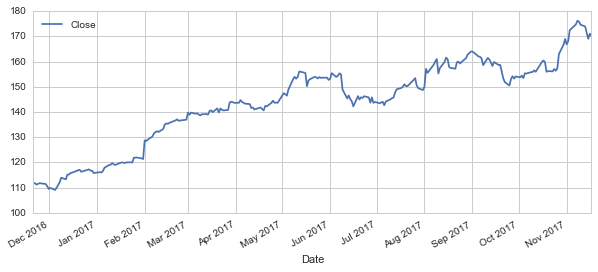

In [12]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

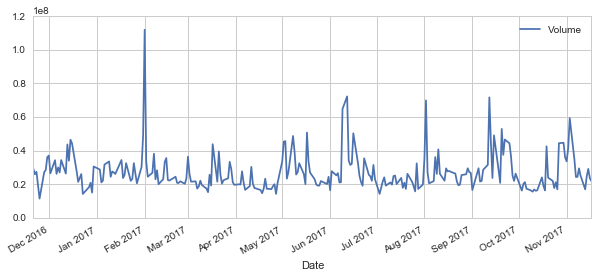

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [14]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'], ma)

/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [16]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50
Date,,,,,,,,
2016-11-21,110.12,111.99,110.01,111.73,29264571,NaN,NaN,NaN
2016-11-22,111.95,112.42,111.40,111.80,25965534,NaN,NaN,NaN
2016-11-23,111.36,111.51,110.33,111.23,27426394,NaN,NaN,NaN
2016-11-25,111.47,111.87,110.95,111.79,11475922,NaN,NaN,NaN
2016-11-28,111.43,112.46,111.39,111.57,27193983,NaN,NaN,NaN


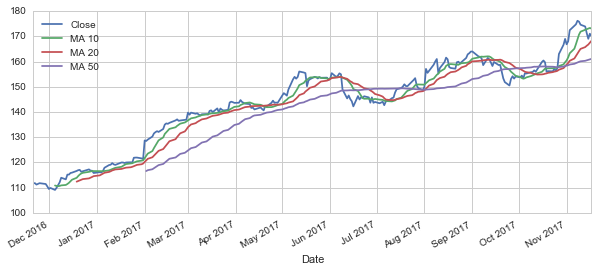

In [20]:
AAPL[['Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [21]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

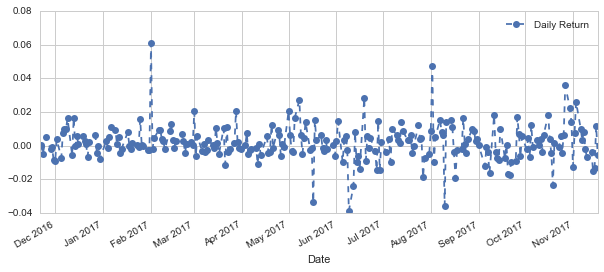

In [28]:
AAPL['Daily Return'].plot(figsize=(10, 4),legend=True, linestyle='--', marker='o')

/Users/nakanoken/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


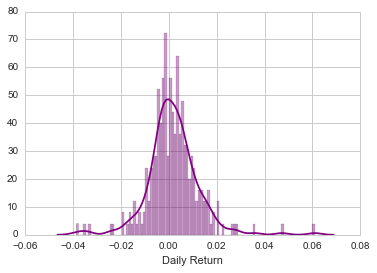

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

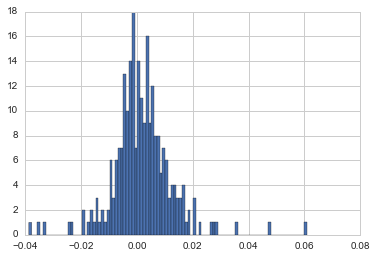

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [33]:
cloising_df = DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'google', start, end)['Close']

In [35]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,
2016-11-21,110.12,111.99,110.01,111.73,29264571,NaN,NaN,NaN,NaN
2016-11-22,111.95,112.42,111.40,111.80,25965534,NaN,NaN,NaN,0.000627
2016-11-23,111.36,111.51,110.33,111.23,27426394,NaN,NaN,NaN,-0.005098
2016-11-25,111.47,111.87,110.95,111.79,11475922,NaN,NaN,NaN,0.005035
2016-11-28,111.43,112.46,111.39,111.57,27193983,NaN,NaN,NaN,-0.001968


In [64]:
closing_df = pd.concat([AAPL['Close'], GOOG['Close'], MSFT['Close'], AMZN['Close']], axis=1)

In [66]:
closing_df.columns = tech_list

In [67]:
tech_rets = closing_df.pct_change()

In [68]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-11-21,NaN,NaN,NaN,NaN
2016-11-22,0.000627,-0.001209,0.004272,0.006833
2016-11-23,-0.005098,-0.009476,-0.011780,-0.006634
2016-11-25,0.005035,0.000907,0.002152,0.000320
2016-11-28,-0.001968,0.008613,0.001322,-0.017428


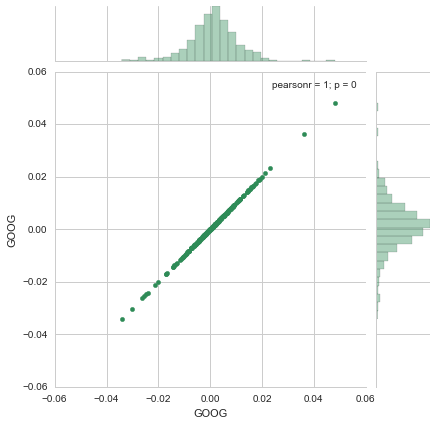

In [69]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

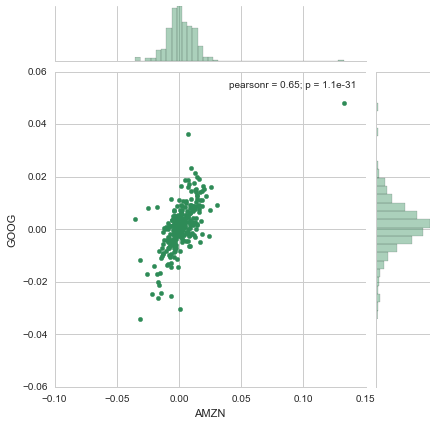

In [70]:
sns.jointplot('AMZN', 'GOOG', tech_rets, kind='scatter', color='seagreen')

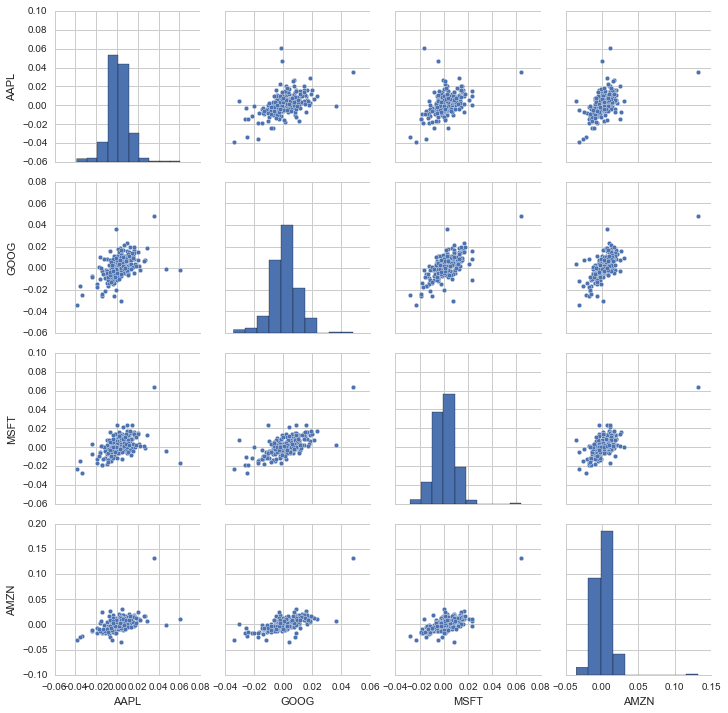

In [71]:
sns.pairplot(tech_rets.dropna())

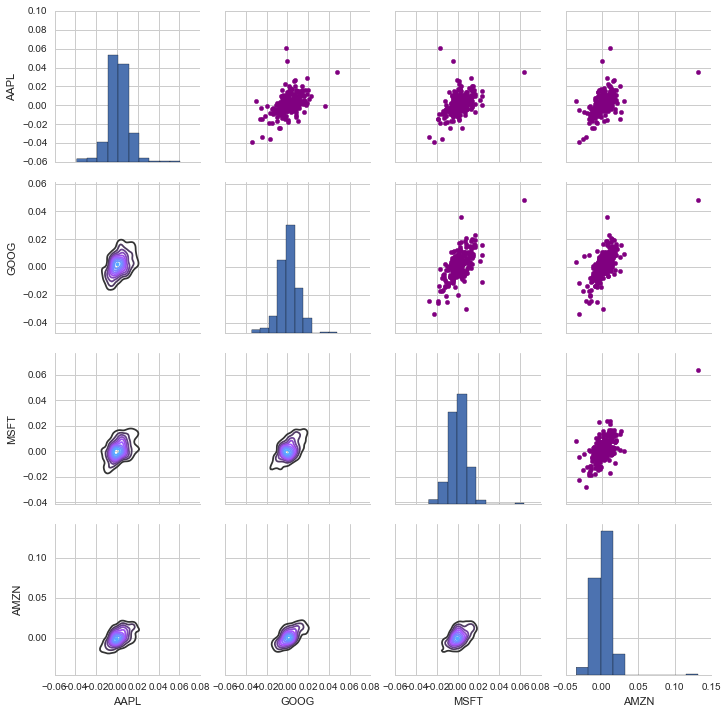

In [74]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist)

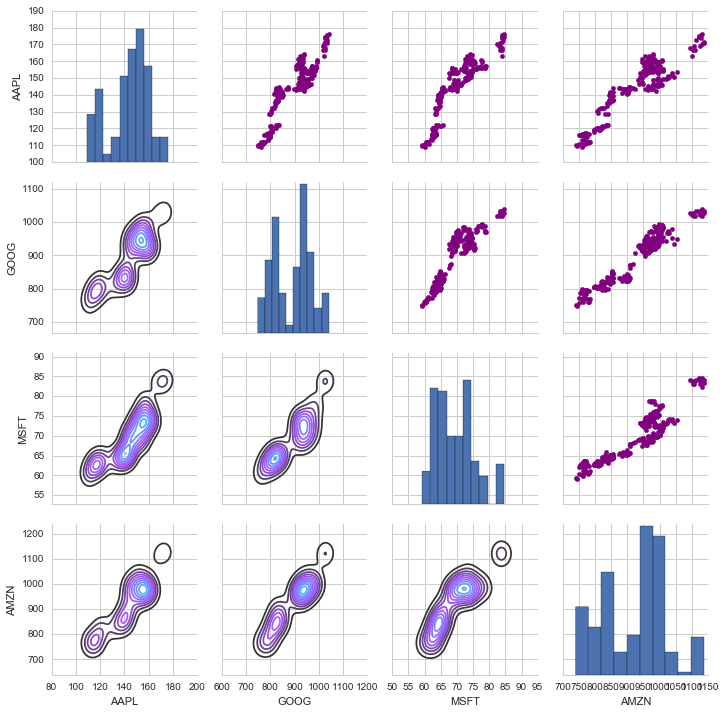

In [81]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist)

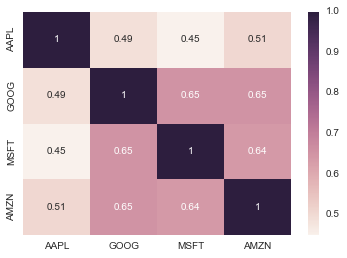

In [77]:
sns.heatmap(tech_rets.corr(), annot=True)

In [82]:
rets = tech_rets.dropna()
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-11-22,0.000627,-0.001209,0.004272,0.006833
2016-11-23,-0.005098,-0.009476,-0.011780,-0.006634
2016-11-25,0.005035,0.000907,0.002152,0.000320
2016-11-28,-0.001968,0.008613,0.001322,-0.017428
2016-11-29,-0.000986,0.003384,0.007919,-0.005543


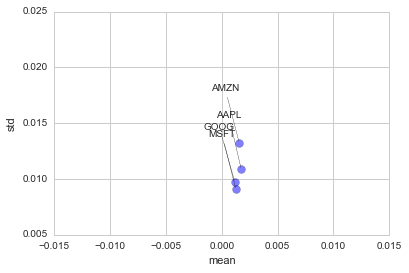

In [93]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.005, 0.025])
plt.xlabel('mean')
plt.ylabel('std')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(0,50),
                textcoords='offset points', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

/Users/nakanoken/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


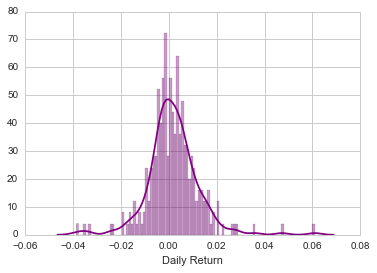

In [95]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [98]:
rets['AAPL'].quantile(0.05)

-0.014182819323148832